In [2]:
import pandas as pd

# Chemin vers votre fichier CSV
file_path = 'financial_loan.csv'

try:
    # Essayer de charger le fichier en détectant automatiquement le séparateur
    data = pd.read_csv(file_path, sep=None, engine='python')
except Exception as e:
    print("Erreur lors de la tentative de détection automatique du séparateur :", e)
    try:
        # Si la détection automatique échoue, essayer de charger en ignorant les lignes mal formatées
        data = pd.read_csv(file_path, error_bad_lines=False, warn_bad_lines=True)
        print("Fichier chargé avec succès en ignorant les lignes mal formatées.")
    except Exception as e2:
        print("Erreur lors du chargement du fichier en ignorant les lignes mal formatées :", e2)

# Affichage des premières lignes pour vérification
print(data.head())


        id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership  issue_date last_credit_pull_date last_payment_date  \
0     C           RENT  11-02-2021            13-09-2021        13-04-2021   
1     E           RENT  01-01-2021            14-12-2021        15-01-2021   
2     C           RENT  05-01-2021            12-12-2021        09-01-2021   
3     B       MORTGAGE  25-02-2021            12-12-2021        12-03-2021   
4     A       MORTGAGE  01-01-2021            14-12-2021        15-01-2021   

   ... sub_grade        term  verification_status annual

#  Gérer les valeurs manquantes

In [3]:
# Imputation des valeurs manquantes pour les colonnes numériques
for column in ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']:
    data[column].fillna(data[column].median(), inplace=True)

# Remplacer les valeurs manquantes dans les colonnes catégorielles par 'Inconnu'
categorical_columns = ['emp_title', 'grade', 'home_ownership', 'loan_status', 'purpose', 'sub_grade', 'term', 'verification_status']
for column in categorical_columns:
    data[column].fillna('Inconnu', inplace=True)


# Encodage des variables catégorielles

In [4]:
# Encodage one-hot pour les variables catégorielles
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


# Visualisation des données

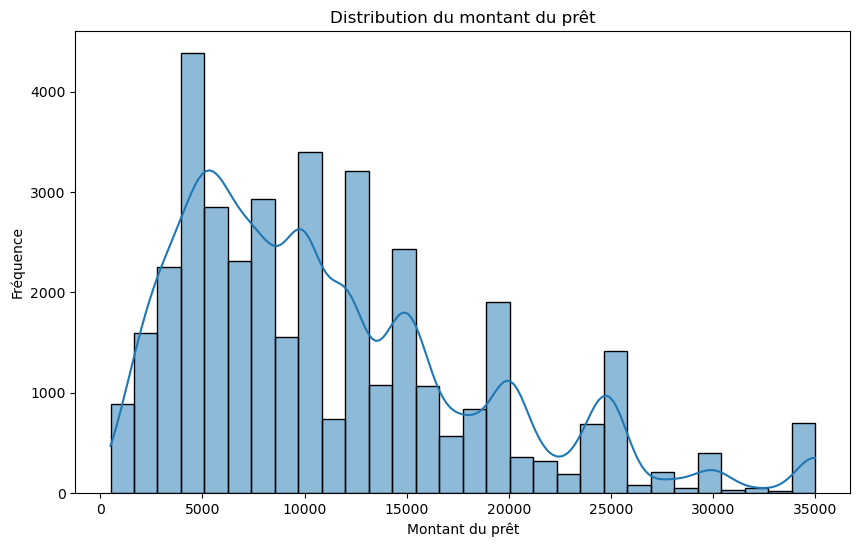

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution du montant du prêt
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amount'], bins=30, kde=True)
plt.title('Distribution du montant du prêt')
plt.xlabel('Montant du prêt')
plt.ylabel('Fréquence')
plt.show()

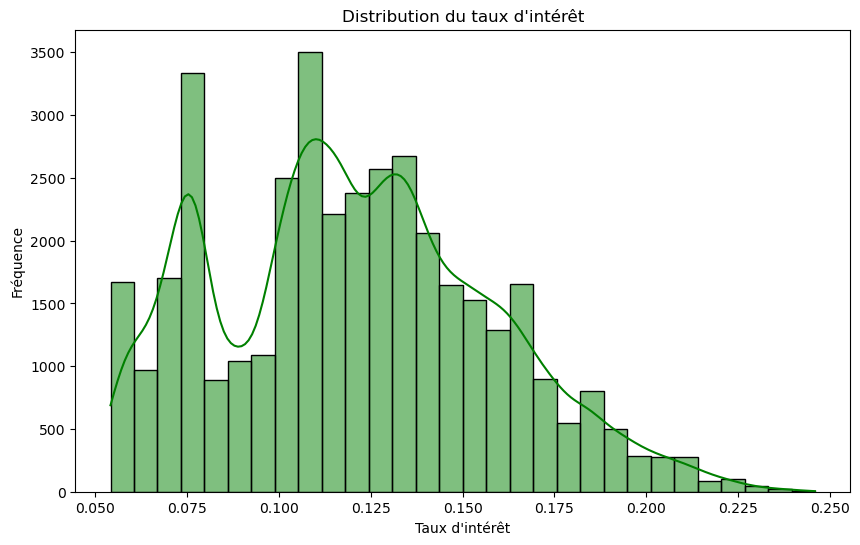

In [6]:
# Distribution du taux d'intérêt
plt.figure(figsize=(10, 6))
sns.histplot(data['int_rate'], bins=30, kde=True, color='green')
plt.title('Distribution du taux d\'intérêt')
plt.xlabel('Taux d\'intérêt')
plt.ylabel('Fréquence')
plt.show()

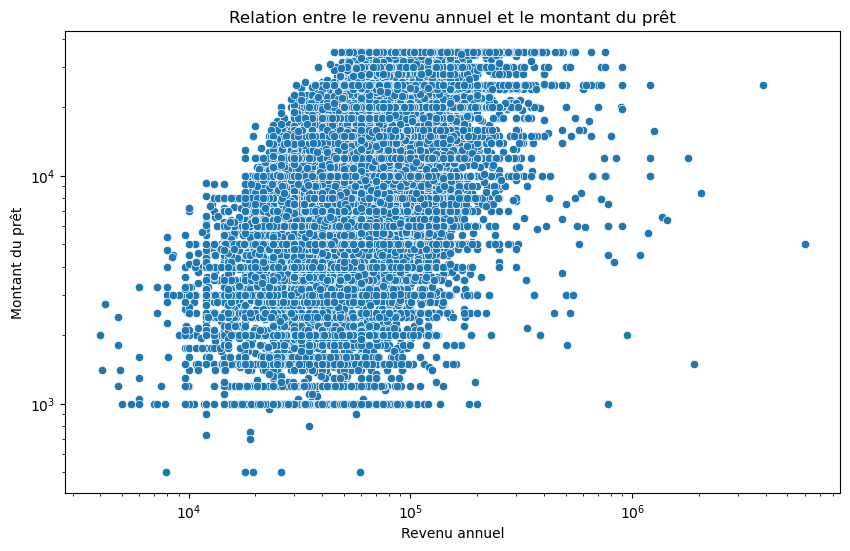

In [7]:
# Relation entre le revenu annuel et le montant du prêt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='loan_amount', data=data)
plt.title('Relation entre le revenu annuel et le montant du prêt')
plt.xlabel('Revenu annuel')
plt.ylabel('Montant du prêt')
plt.xscale('log')  # Utiliser l'échelle logarithmique pour une meilleure visualisation
plt.yscale('log')
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Sample data generation for demonstration
np.random.seed(0)
data_size = 1000
features = np.random.rand(data_size, 10)
target = np.random.randint(2, size=data_size)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# Placeholder for model results
results = []

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC Score": roc_auc
    })

# Converting results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df


,Model,Precision,Recall,F1-Score,ROC-AUC Score
0,Logistic Regression,0.451613,0.301075,0.361290,0.512913
1,Decision Tree,0.477778,0.462366,0.469945,0.511557
2,Random Forest,0.492754,0.365591,0.419753,0.519596
3,SVM,0.530612,0.559140,0.544503,0.436539
